<a href="https://colab.research.google.com/github/ParthJ39/analysis-magic-gamma-dataset/blob/main/MagicGamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository.
https://doi.org/10.24432/C52C8B.

The data set was generated by a Monte Carlo program, Corsika, described in:
D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
Forschungszentrum Karlsruhe FZKA 6019 (1998).

http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# Read the CSV file that is selected and convert it into the padas dataframe object
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
# finding the different class values given to the data record rows
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
# converting the class values that are character values in numeric values which is 0's and 1's
df["class"]  = (df["class"] == "g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

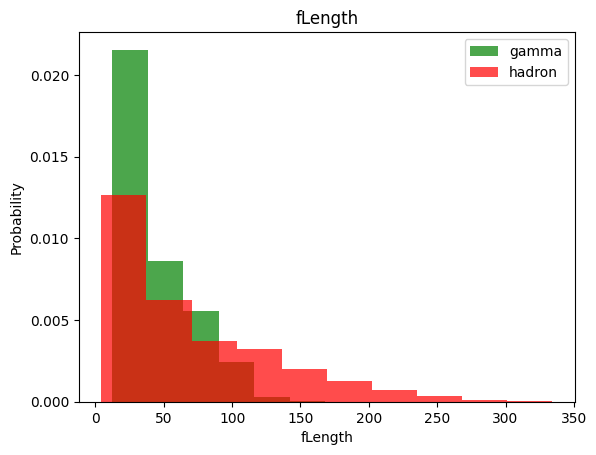

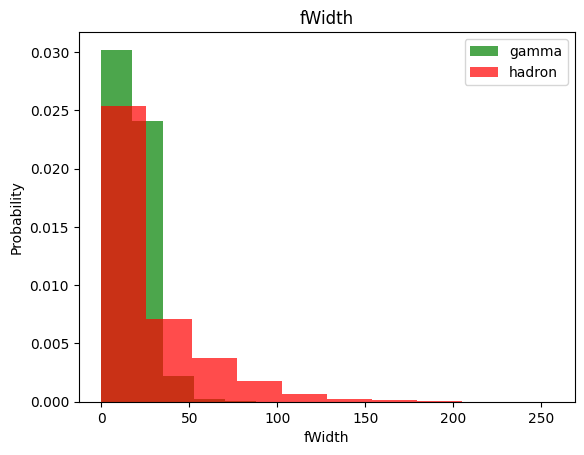

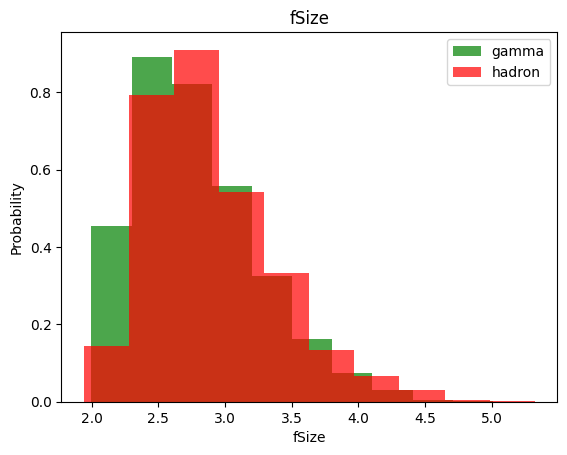

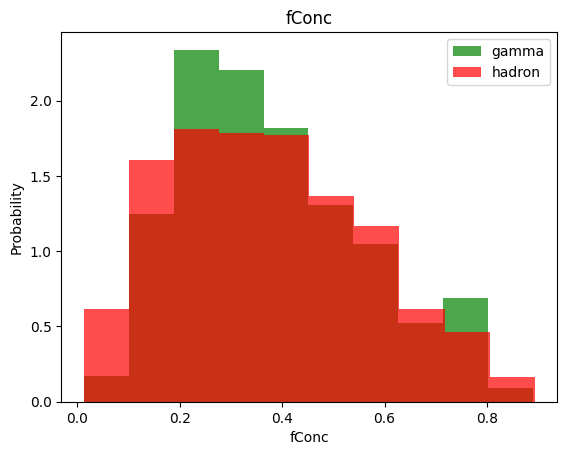

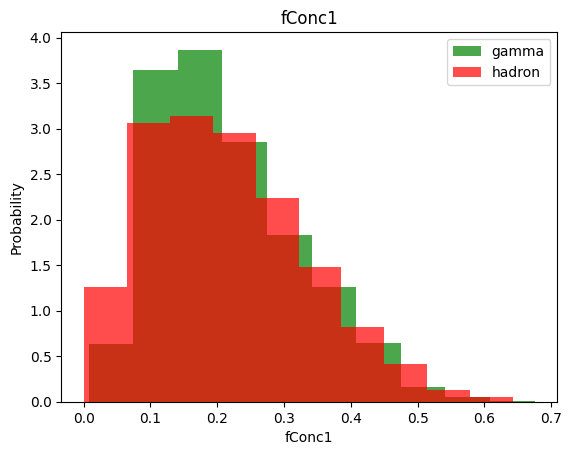

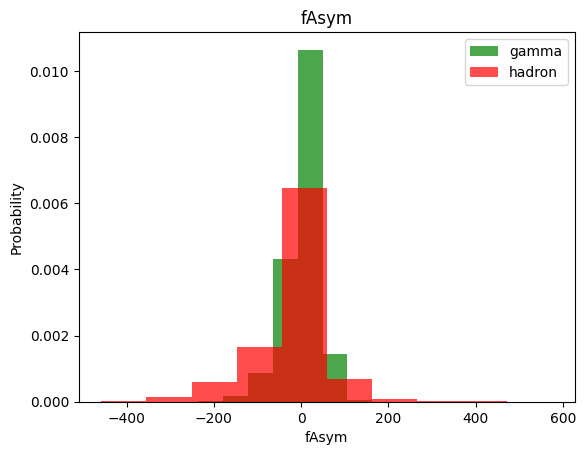

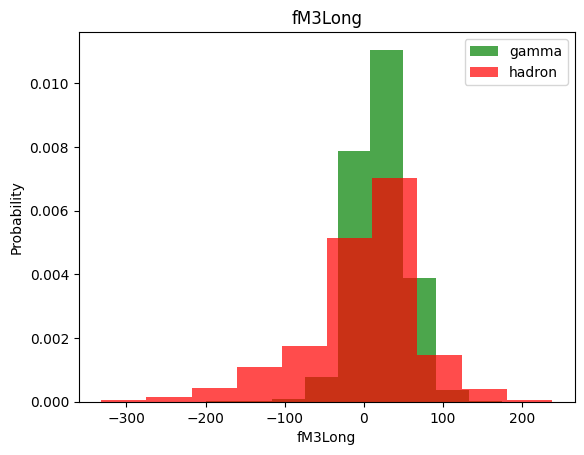

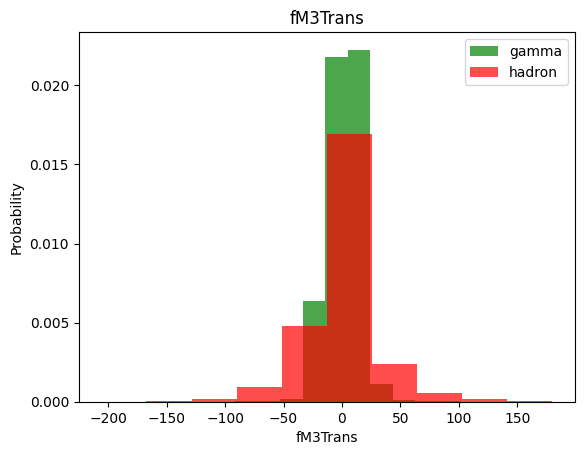

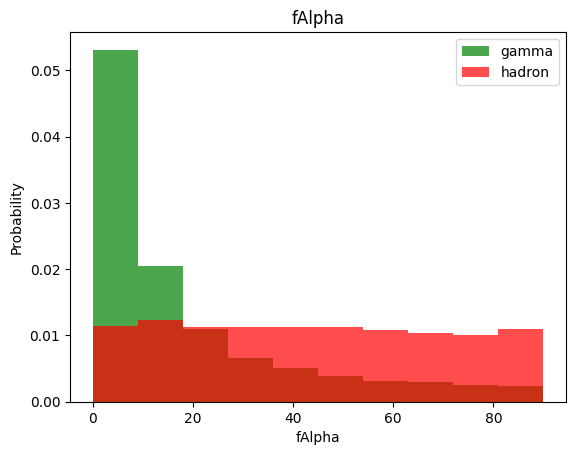

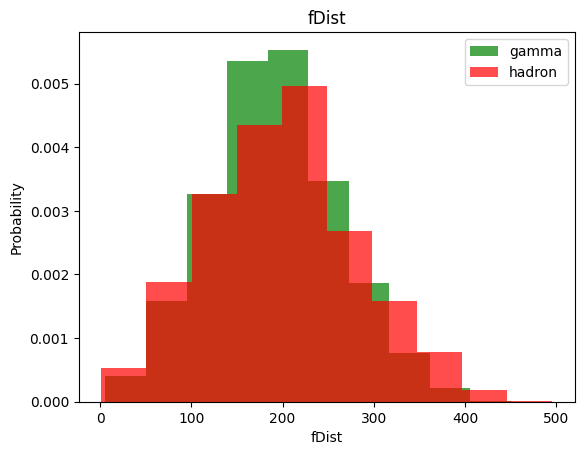

In [ ]:
# Analysing how different features in the feature vectors affect the output i.e, CLASS data
# density as True means we need to normalize the data
# plt.legend() - helps viewer to understand what each line or curve represents.
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = 'green', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color = 'red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Creating Train, Validation and Test datsets

In [ ]:
# So here we are dividing our data into 3 fractions i.e. train, validation and test
# using df.sample we will sample the data with 0-60 percent of the data as train 60-80 for validation and 80-100 for test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
# bring the values of each feature vectors relative to mean and S.D by scaling
def scale_dataset(dataframe, oversample=False):
  # all the feature vectors in x
  x = dataframe[dataframe.columns[:-1]].values
  # the output or prediction vector values we will use for training in y
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  # take values of x fit and than transform the values to get new x
  x = scaler.fit_transform(x)

  # in output we have more of gamma data records as compared to hadron
  # so this could generate bias while training, we can avoid that by performing over-sampling
  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x, y)

  # stack the data in x and y horizontally side-by-side
  # x is a 2-D object and y is only 1-D as it have only output values we need to re-shape
  # -1 is same as length of y
  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# K Nearest Neighbour's

In [ ]:
# Sklear has the KNN model alogorithm encoded already, so we will directly use that
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
# we are creating the objection KNeighborsClassifier with K as 5
knn_model = KNeighborsClassifier(n_neighbors=5)
# we train the model
knn_model = knn_model.fit(x_train, y_train)

In [ ]:
# Now we will validate the model on the test dataset
yknn_pred = knn_model.predict(x_test)

In [ ]:
# now we will print the classification report to validate the prediction
# for this we will provide he predicted y value i.e, y_pred and actual y values i.e, y_test
# True Positives (TP): The model correctly predicted positive instances.
# False Positives (FP): The model incorrectly predicted positive instances.
# True Negatives (TN): The model correctly predicted negative instances.
# False Negatives (FN): The model incorrectly predicted negative instances.
# Here precision tells the percentage of class classified as gamma/hadron that are indeed gmmma/hadron.
# Here recall tells the percentage of actual gamma/hadron class that the model correctly identified.
# A high F1 score indicates a good balance between precision and recall.
print(classification_report(y_test, yknn_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1356
           1       0.85      0.86      0.86      2448

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

MAP aims to find the most probable hypothesis (parameter or class label) by combining the observed evidence with prior beliefs about the data.(MAP Estimation combines what it knew before with what it sees now to make the most likely guess. It asks itself, "Given what I know and what I see, which CLASS is more likely to be correct?")

In Bayesian probability, we have a prior probability (prior) and a likelihood function. The prior represents our initial belief or knowledge about the probability of an event before observing any data. The likelihood function describes how likely the observed data is given a particular hypothesis or parameter value. The MAP estimation combines these two pieces of information to find the hypothesis that maximizes the posterior probability.

P(C | x1, x2, ..., xn) = P(C) * P(x1 | C) * P(x2 | C) * ... * P(xn | C) / P(x1) * P(x2) * ... * P(xn)

In the Naive Bayes classifier, the class label (C) with the highest posterior probability is selected as the predicted class label for the given features.

The decision rule for MAP estimation in Naive Bayes is simple: Choose the class label (C) that maximizes the posterior probability:

C_MAP = argmax(P(C) * P(x1 | C) * P(x2 | C) * ... * P(xn | C))

In practical terms, during the training phase of Naive Bayes, we estimate the prior probabilities and likelihood probabilities from the training data. During the prediction phase, we use the MAP estimation to determine the most probable class label for a new set of features.

MAP estimation in Naive Bayes makes the algorithm robust and efficient, particularly in text classification and other tasks where the "bag-of-words" assumption is reasonable. It is a powerful and widely used technique for probabilistic classification problems.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
ynb_pred = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, ynb_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1356
           1       0.73      0.90      0.80      2448

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.69      3804



# Logistic Regression

Logistic regression is a machine learning algorithm that is used to predict the probability of an event happening. For example, we could use logistic regression to predict the probability of a customer buying a product, or the probability of a patient having a disease.

Logistic regression works by first finding a linear relationship between the features of a data set and the target variable. The features are the independent variables, and the target variable is the dependent variable. For example, in the customer buying product example, the features might be the customer's age, income, and gender. The target variable would be whether or not the customer bought the product.

Once the linear relationship has been found, logistic regression uses the sigmoid function to map the linear relationship to a probability. The sigmoid function is a mathematical function that takes a real number as input and outputs a number between 0 and 1. The sigmoid function is defined as follows:

sigmoid(x) = 1 / (1 + exp(-x))

The sigmoid function is shaped like an S, and it has the following properties:

    If x is a very large positive number, then sigmoid(x) will be close to 1.
    If x is a very large negative number, then sigmoid(x) will be close to 0.
    If x is zero, then sigmoid(x) will be equal to 0.5.

The sigmoid function is used in logistic regression because it allows us to map the linear relationship between the features and the target variable to a probability. For example, if the linear relationship is such that the predicted value is 0.7, then the sigmoid function will map this to a probability of 70%.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
ylg_pred = lg_model.predict(x_test)
print(classification_report(y_test, ylg_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1356
           1       0.83      0.82      0.82      2448

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machine's
1. For this we have features on the axis and based on that feaures the CLASS or the labels -> for understanding consider there are 2 feaures on x and y axis and two classes for prediction. so as per the SVM model we need to find the line(2-D)/plane(3-d) that best divides the CLASSES/labels. We have to find the lines that has the maximum margin(line drawn by considering the support vectors(the CLASS label values closest to our prediction line for each CLASS)).
2. SVM model is affected by the outliers, so if there are outliers in your data the SVM would not be able to predict the output correctly

----
a) SVM is a supervised learning algorithm that can be used for both classification and regression tasks. It works by finding the hyperplane that best separates the two classes of data. The hyperplane is a line or plane that divides the data into two regions, with all the points of one class on one side of the hyperplane and all the points of the other class on the other side. The SVM algorithm tries to find the hyperplane that has the maximum margin between the two classes. This means that the hyperplane should be as far away from the points of both classes as possible.

b) The SVM algorithm can only find linear hyperplanes. However, many datasets are not linearly separable. In these cases, the SVM algorithm can be used with kernel methods to find non-linear hyperplanes. Kernel methods transform the data into a higher dimensional space where the data becomes linearly separable. The most common kernel method used with SVM is the Gaussian kernel. The Gaussian kernel takes two points as input and returns the value of the Gaussian function evaluated at the distance between the two points.

c) Other regression methods, such as linear regression and logistic regression, also use projection lines for prediction. However, these methods do not try to find the hyperplane that has the maximum margin between the two classes. Instead, they try to find the hyperplane that minimizes the error between the predicted and actual values. The predicted value is not determined by an equation of a line but by the distance of a data point to the hyperplane. The distance of a data point to the hyperplane is used to predict its target value.



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
ysvm_pred = svm_model.predict(x_test)
print(classification_report(y_test, ysvm_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1356
           1       0.89      0.91      0.90      2448

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Evaluation
We implemented 3 classification models above with accuraries as KKN(81%), Naive Baye's(73%), logistic regression(78%) and SVM(86%). So based on this we can evalute that SVM best fits's on our data and produce amazing results in the model evaluation.

----------------------------------------------------------------------------------------------------------------------------------------------------------------



#Neural Network
1. A neural network is a machine learning algorithm that is inspired by the human brain. It is made up of a series of interconnected nodes, called neurons. Each neuron takes in a number of inputs and produces an output. The output of one neuron can be used as an input to another neuron.

2. Activation functions are used to add non-linearity to neural networks. Without activation functions, neural networks would be linear models, which would only be able to learn linear relationships between the inputs and outputs.There are many different types of activation functions, but some of the most common ones include the sigmoid function, the tanh function, and the ReLU function.

3. The sigmoid function is a S-shaped curve that takes a real number as input and produces a number between 0 and 1 as output. The tanh function is similar to the sigmoid function, but it takes a real number as input and produces a number between -1 and 1 as output. The ReLU function is a linear function that takes a real number as input and produces a number that is either 0 or the input as output.

4. Back-propagation is an algorithm used to train neural networks. It works by calculating the error between the predicted outputs of the network and the desired outputs. The error is then used to update the weights of the network in a way that minimizes the error.Back-propagation is a iterative process that is repeated until the error is small enough.

5. Through this process of forward pass (**The input is multiplied by the weights and passed through the activation functions in each layer**), loss calculation (**difference between the predicted output and the true target labels MSE for regression and Cross-Entropy for classification problems**), backpropagation (gradients (**gradient represents how much the loss will change if the weight or bias is adjusted slightly**) of the loss function with respect to each weight and bias in the neural network), and weight update (**weights and biases are then updated using an optimization algorithm**), neural networks gradually learn from the data and improve their performance on the task they are trained for.

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary cross-entropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [ ]:
# So, we created the neural network a sequential becuase all the layers will be linearlly stacked which are defined in it.
# the input space is 10 becuase we will input all the features we have and we have 10 features thus shape as 10
# units signifies number of output neurons in the layer
# Dropout layer randomly sets a fraction of input units (neurons) to zero during each training step.
# activation is to introduce non-linearity as discussed above
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # training the model and selecting the optimization technique, loss function and metrics we want to capture
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  # use the evaluate() method to evaluate the model on your test dataset
  # fit() method returns a History object, which contains information about the training process, such as the loss and accuracy at each epoch
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


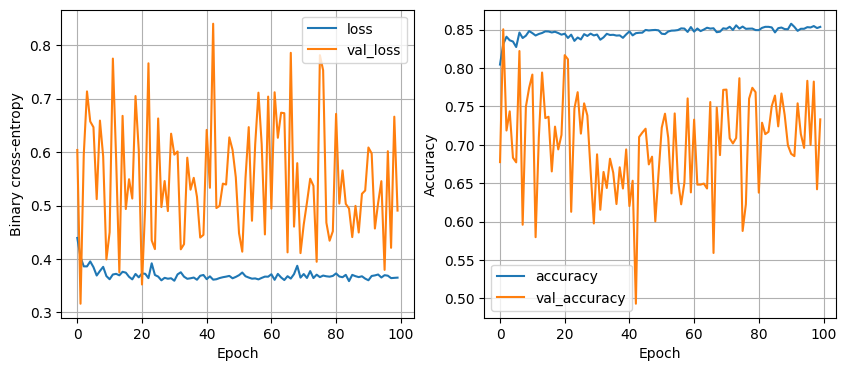

119/119 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8628
16 nodes, dropout 0, lr 0.1, batch size 64


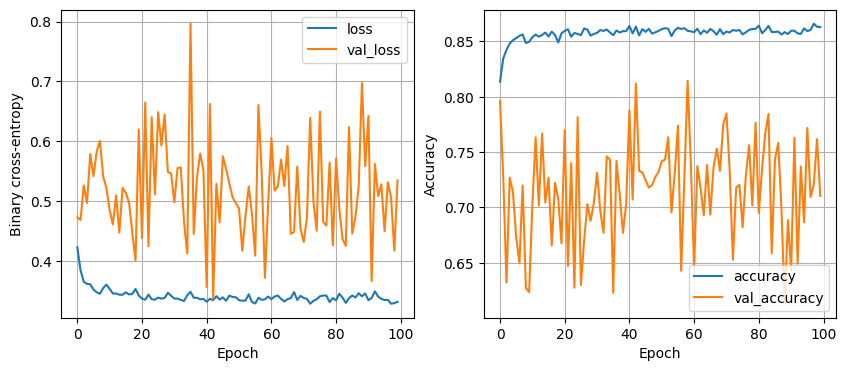

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.1, batch size 128


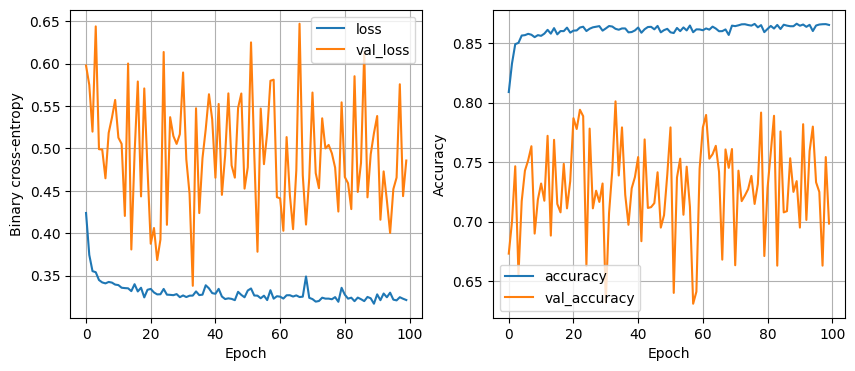

119/119 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.005, batch size 32


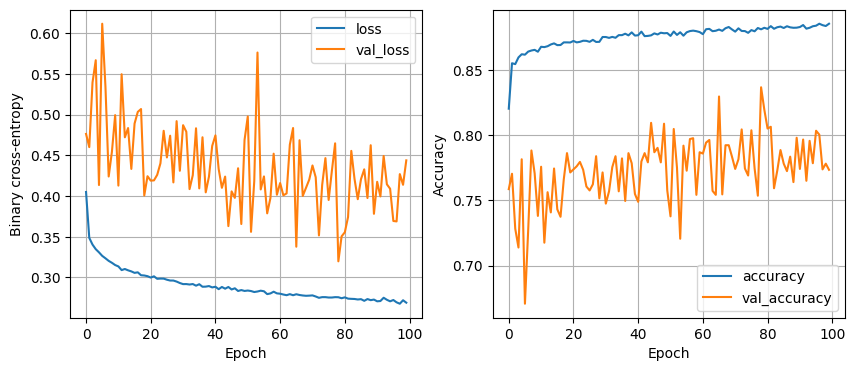

119/119 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8728
16 nodes, dropout 0, lr 0.005, batch size 64


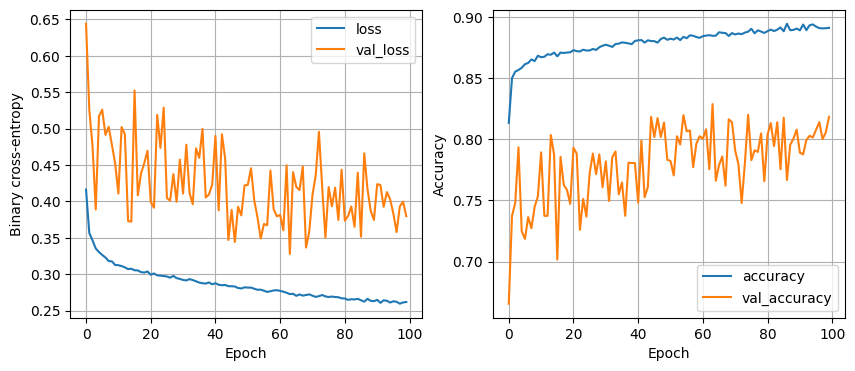

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8809
16 nodes, dropout 0, lr 0.005, batch size 128


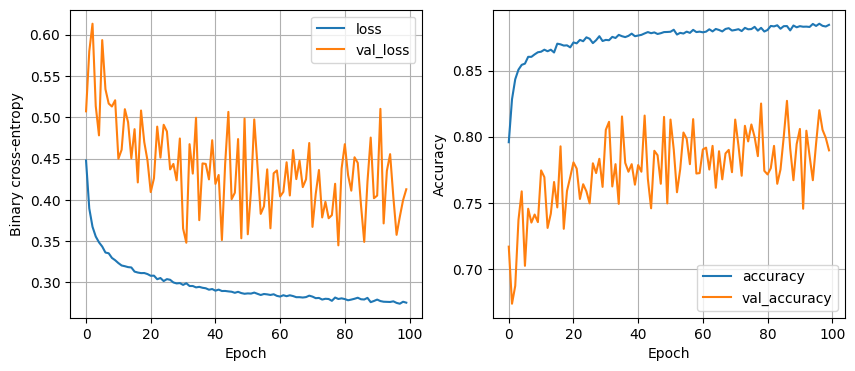

119/119 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8833
16 nodes, dropout 0, lr 0.001, batch size 32


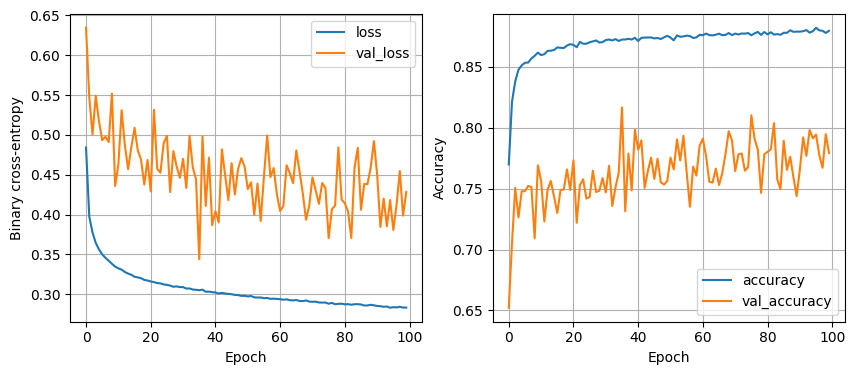

119/119 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8791
16 nodes, dropout 0, lr 0.001, batch size 64


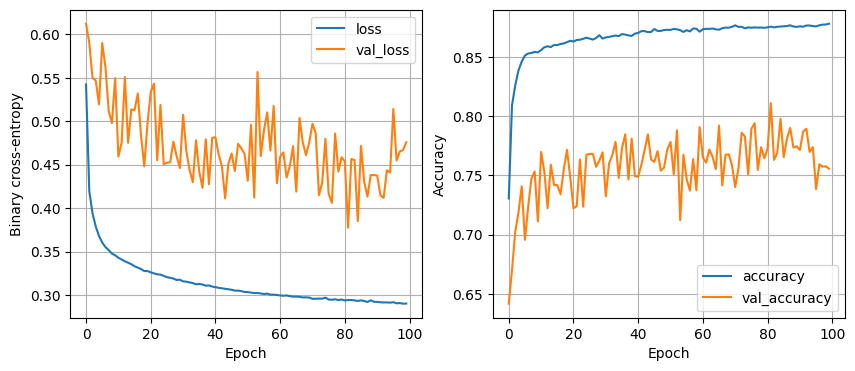

119/119 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.001, batch size 128


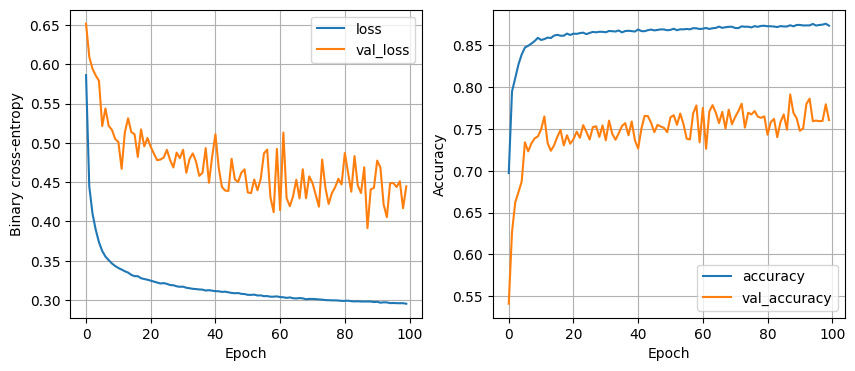

119/119 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8820
16 nodes, dropout 0.2, lr 0.1, batch size 32


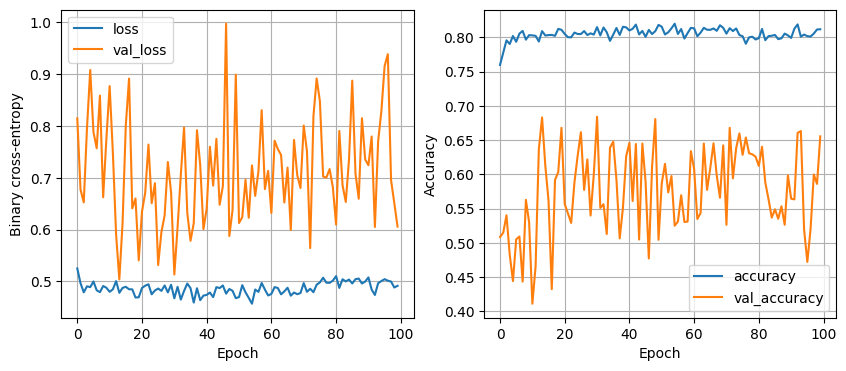

119/119 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.8349
16 nodes, dropout 0.2, lr 0.1, batch size 64


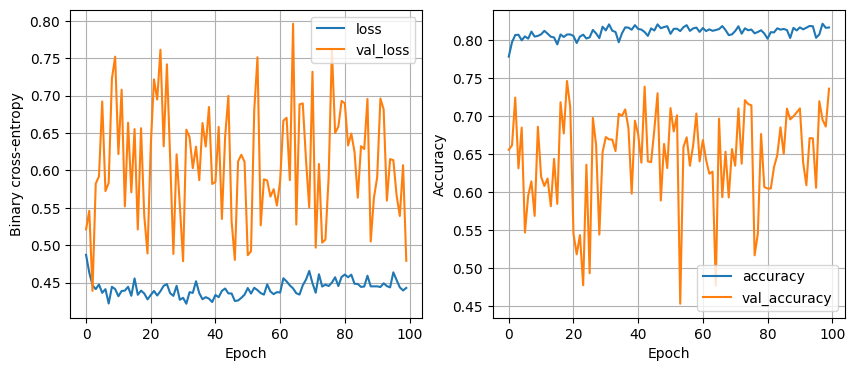

119/119 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8591
16 nodes, dropout 0.2, lr 0.1, batch size 128


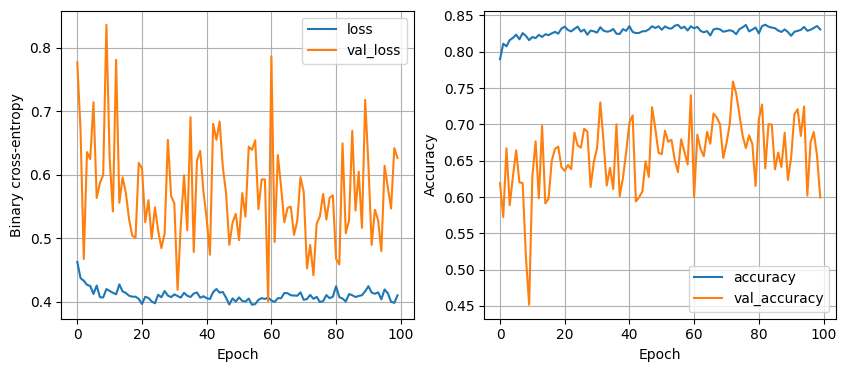

119/119 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8517
16 nodes, dropout 0.2, lr 0.005, batch size 32


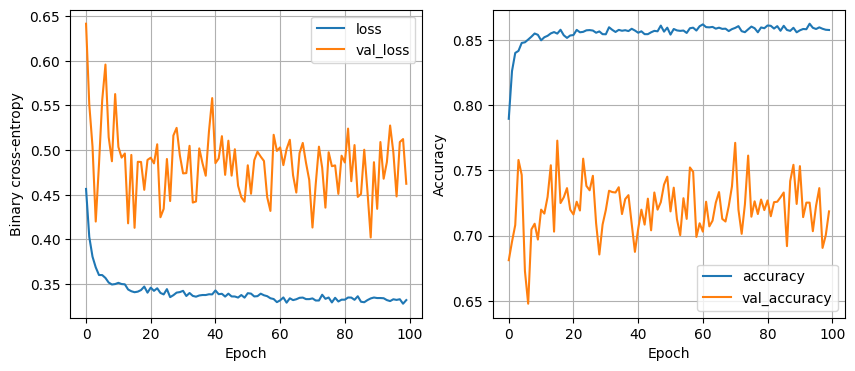

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.005, batch size 64


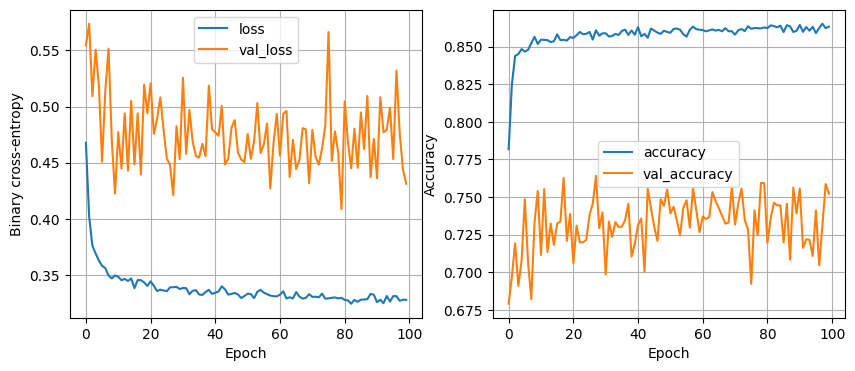

119/119 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8778
16 nodes, dropout 0.2, lr 0.005, batch size 128


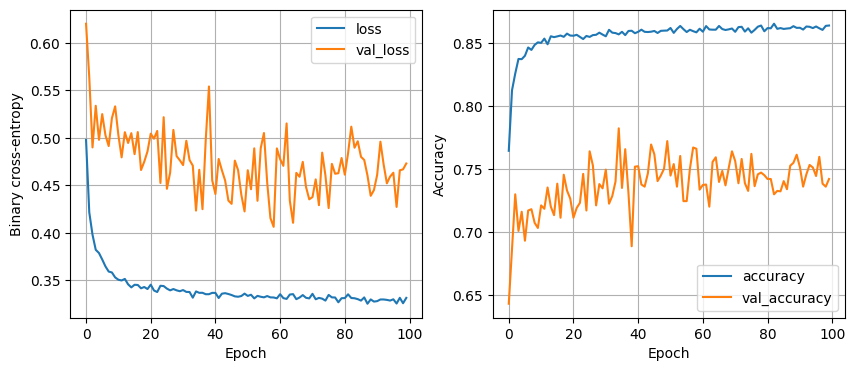

119/119 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.001, batch size 32


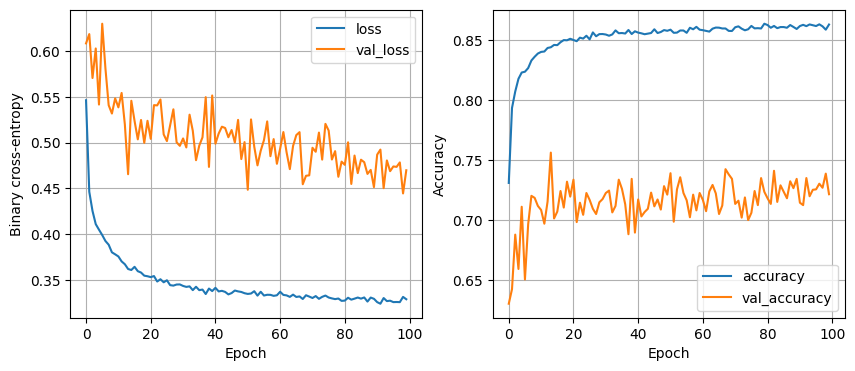

119/119 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8767
16 nodes, dropout 0.2, lr 0.001, batch size 64


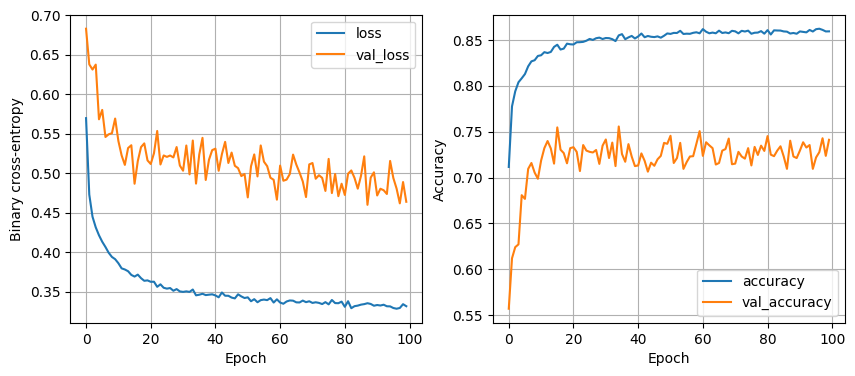

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8767
16 nodes, dropout 0.2, lr 0.001, batch size 128


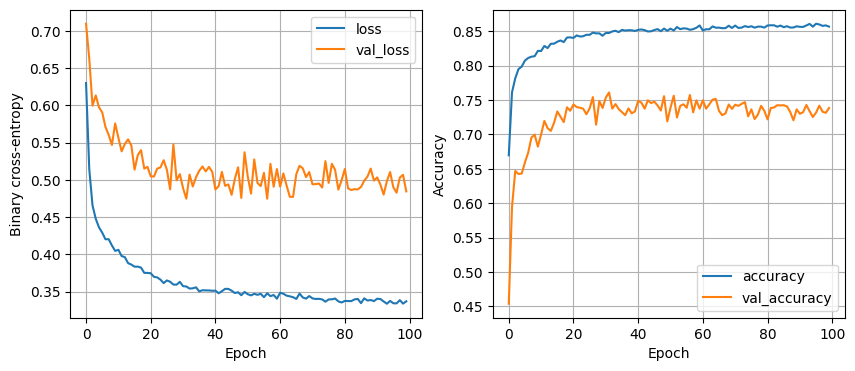

119/119 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8741
32 nodes, dropout 0, lr 0.1, batch size 32


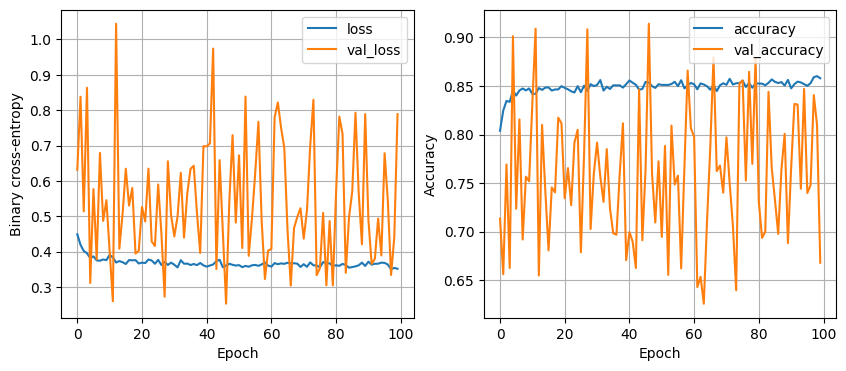

119/119 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.1, batch size 64


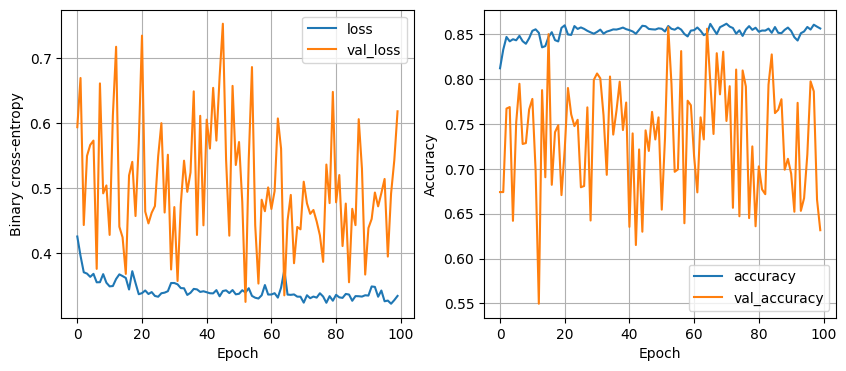

119/119 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8575
32 nodes, dropout 0, lr 0.1, batch size 128


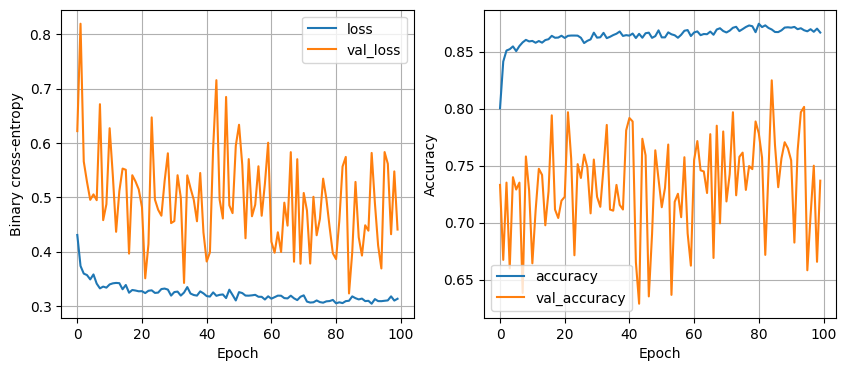

119/119 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8775
32 nodes, dropout 0, lr 0.005, batch size 32


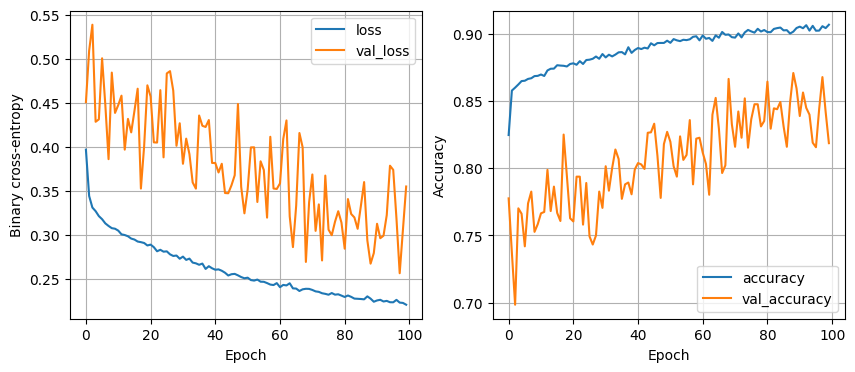

119/119 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8672
32 nodes, dropout 0, lr 0.005, batch size 64


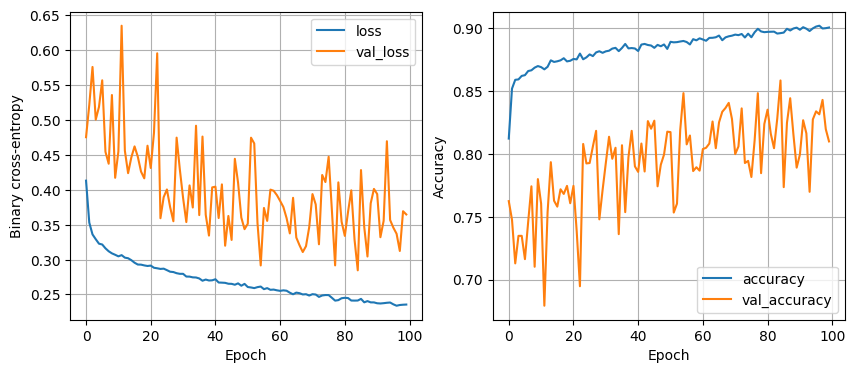

119/119 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8712
32 nodes, dropout 0, lr 0.005, batch size 128


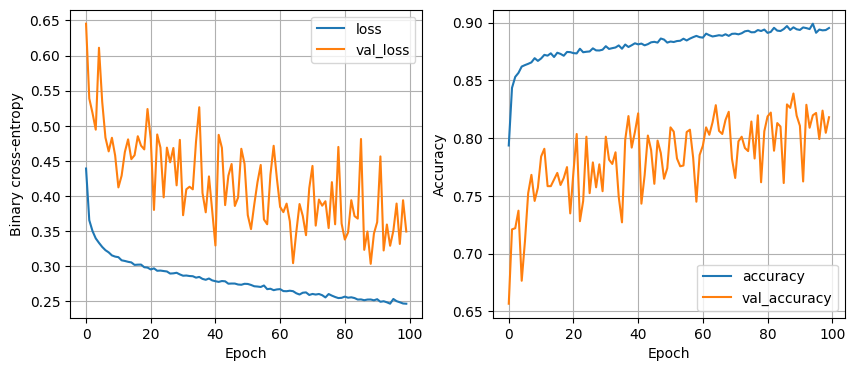

119/119 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.8717
32 nodes, dropout 0, lr 0.001, batch size 32


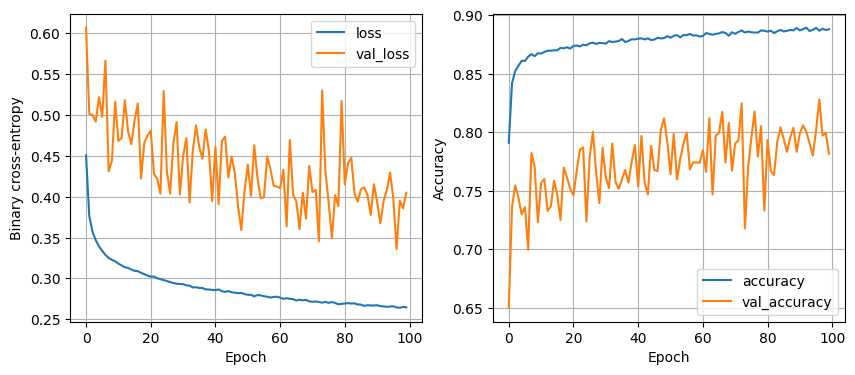

119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8722
32 nodes, dropout 0, lr 0.001, batch size 64


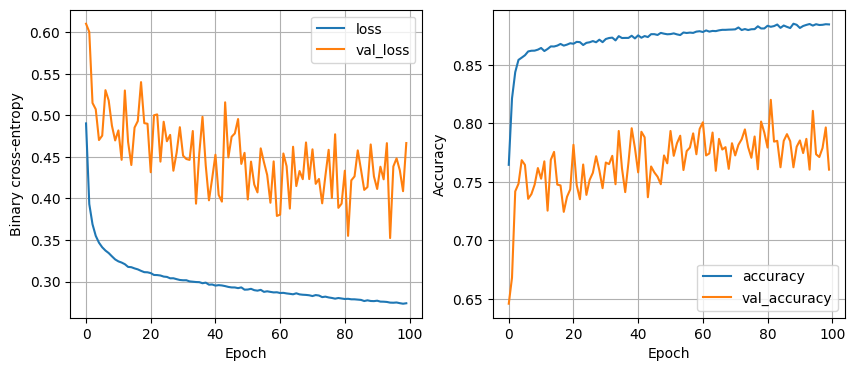

119/119 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8770
32 nodes, dropout 0, lr 0.001, batch size 128


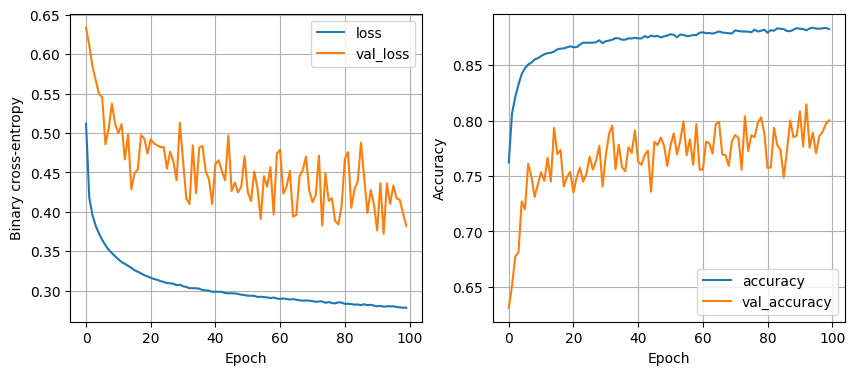

119/119 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8767
32 nodes, dropout 0.2, lr 0.1, batch size 32


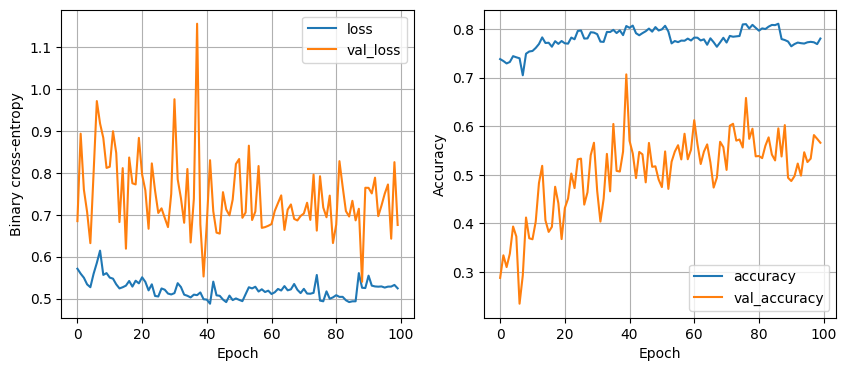

119/119 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.8236
32 nodes, dropout 0.2, lr 0.1, batch size 64


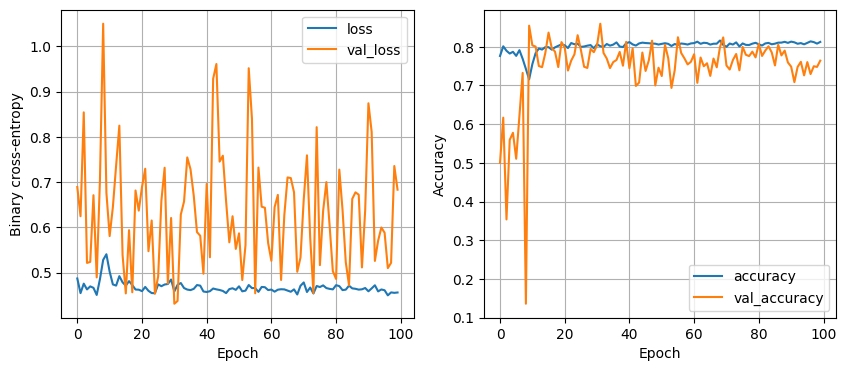

119/119 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8460
32 nodes, dropout 0.2, lr 0.1, batch size 128


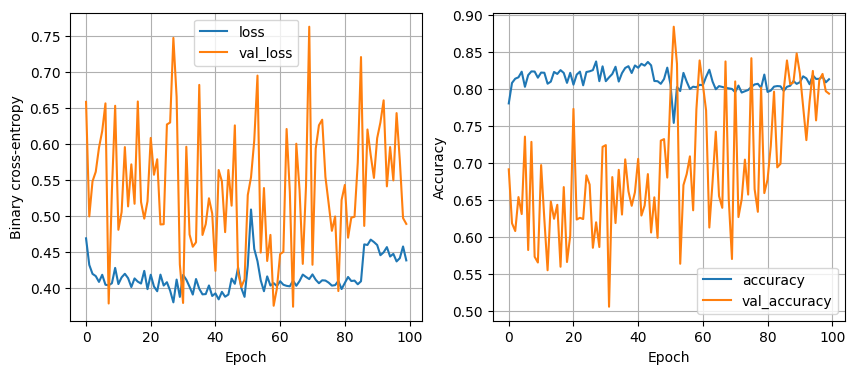

119/119 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8417
32 nodes, dropout 0.2, lr 0.005, batch size 32


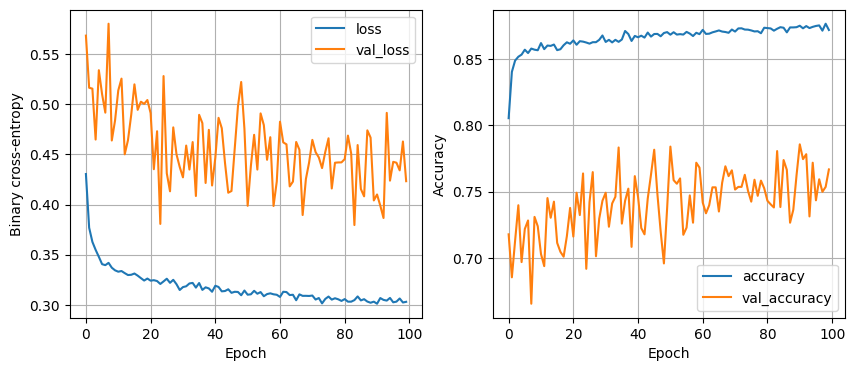

119/119 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8862
32 nodes, dropout 0.2, lr 0.005, batch size 64


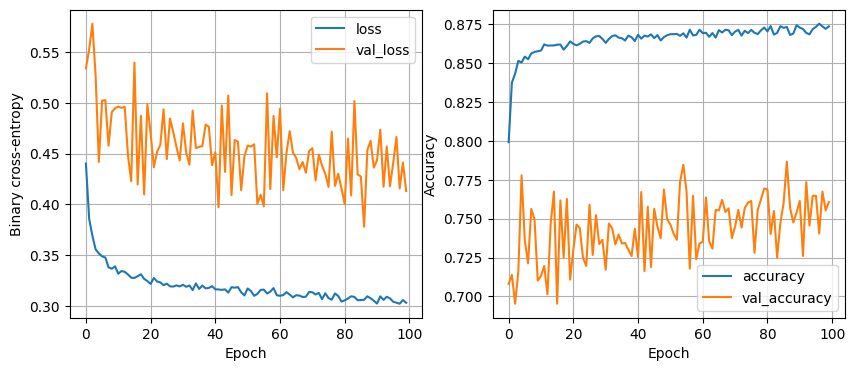

119/119 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8793
32 nodes, dropout 0.2, lr 0.005, batch size 128


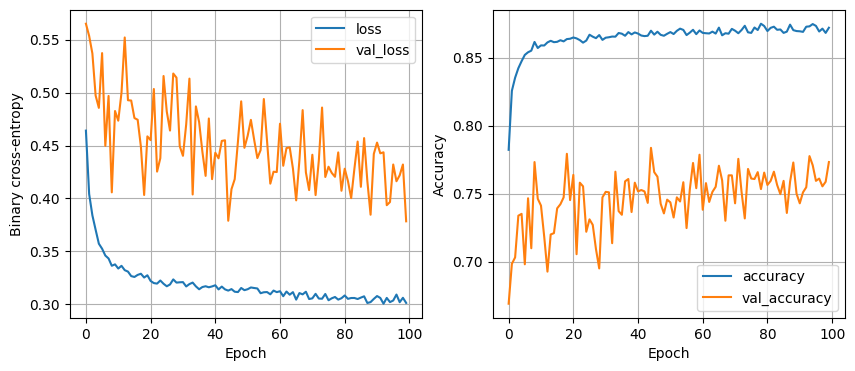

119/119 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8804
32 nodes, dropout 0.2, lr 0.001, batch size 32


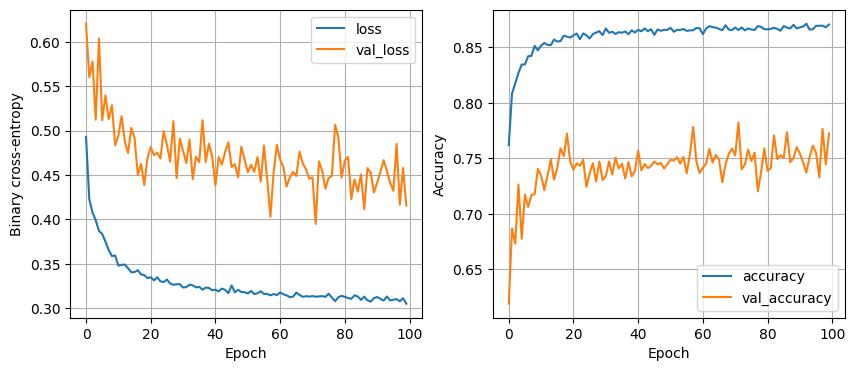

119/119 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8804
32 nodes, dropout 0.2, lr 0.001, batch size 64


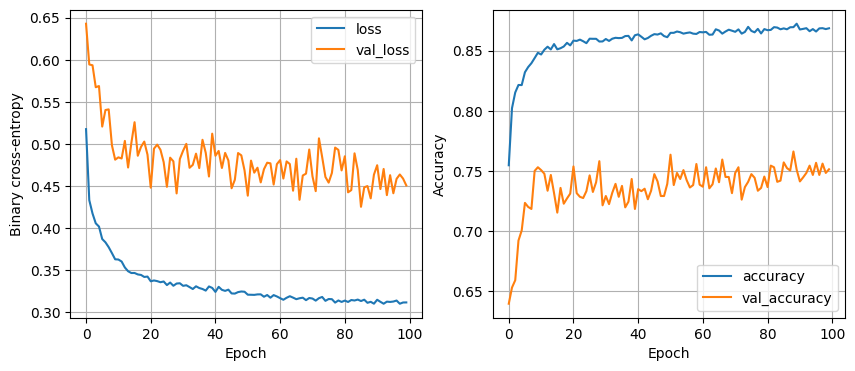

119/119 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8820
32 nodes, dropout 0.2, lr 0.001, batch size 128


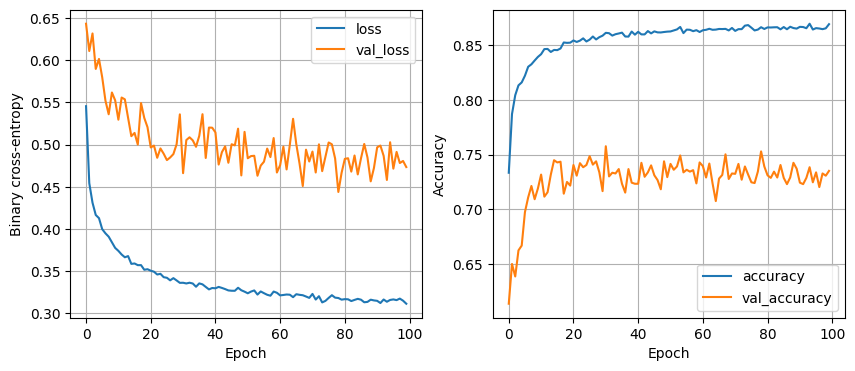

119/119 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8796
64 nodes, dropout 0, lr 0.1, batch size 32


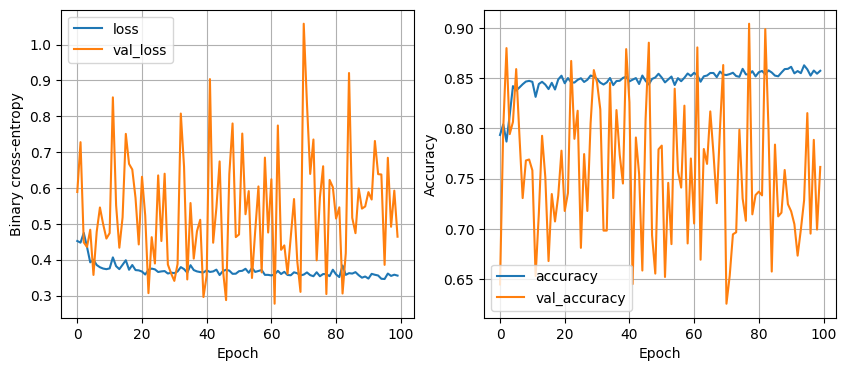

119/119 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8625
64 nodes, dropout 0, lr 0.1, batch size 64


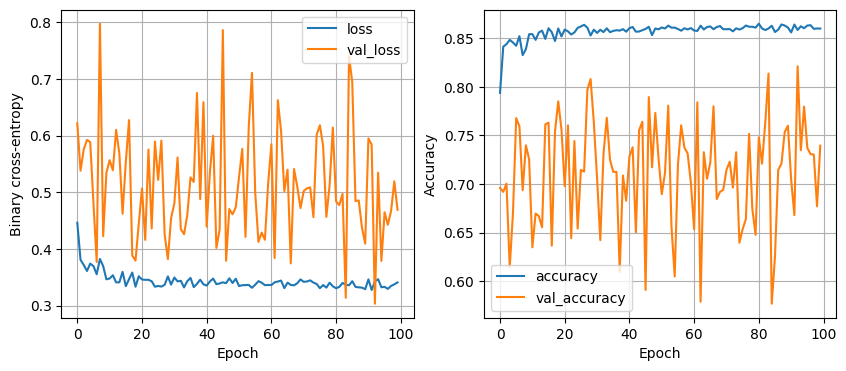

119/119 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8715
64 nodes, dropout 0, lr 0.1, batch size 128


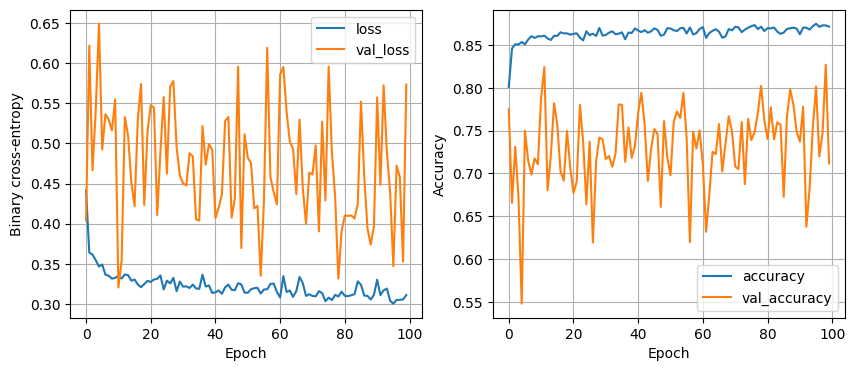

119/119 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8751
64 nodes, dropout 0, lr 0.005, batch size 32


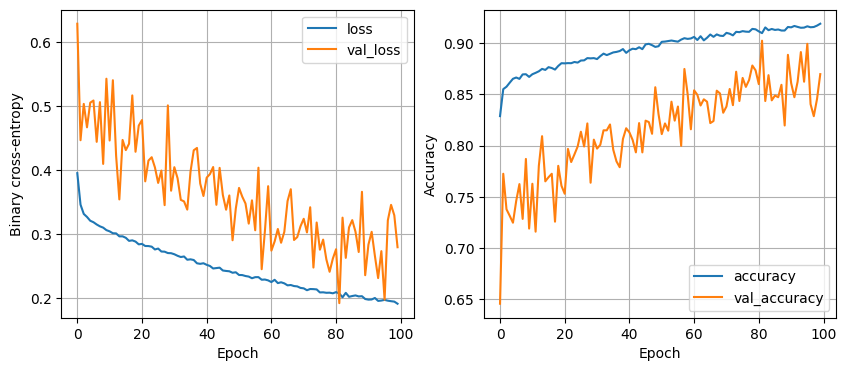

119/119 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.8646
64 nodes, dropout 0, lr 0.005, batch size 64


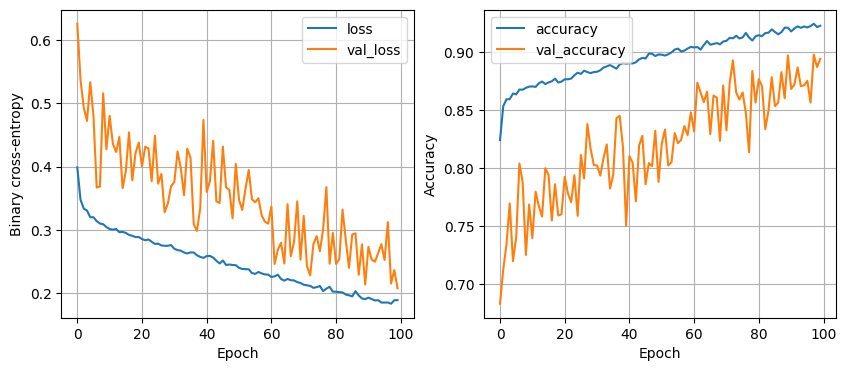

119/119 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8620
64 nodes, dropout 0, lr 0.005, batch size 128


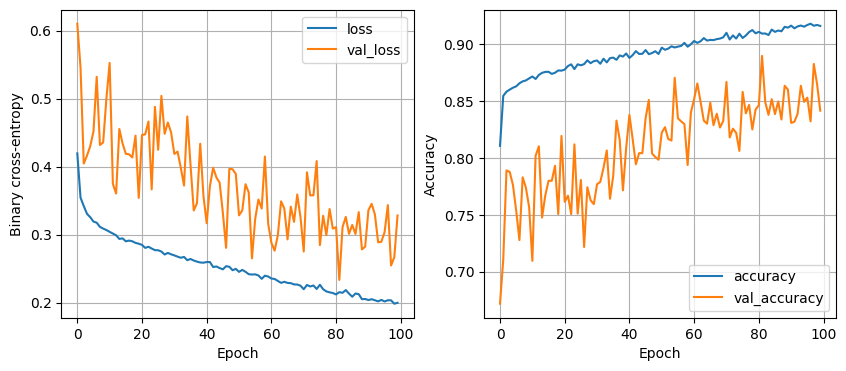

119/119 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8725
64 nodes, dropout 0, lr 0.001, batch size 32


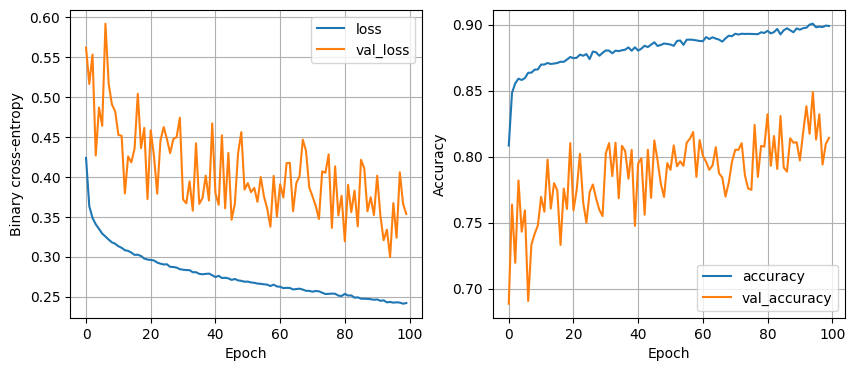

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8762
64 nodes, dropout 0, lr 0.001, batch size 64


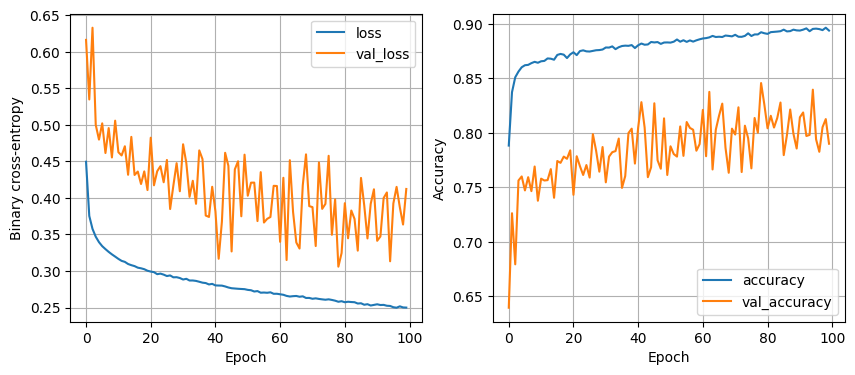

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8785
64 nodes, dropout 0, lr 0.001, batch size 128


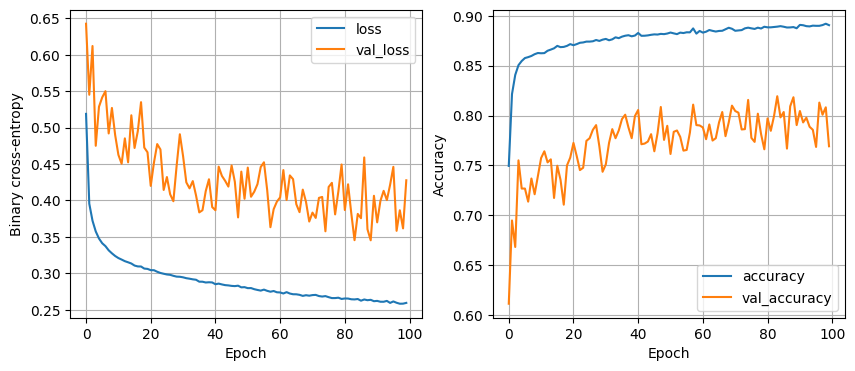

119/119 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.1, batch size 32


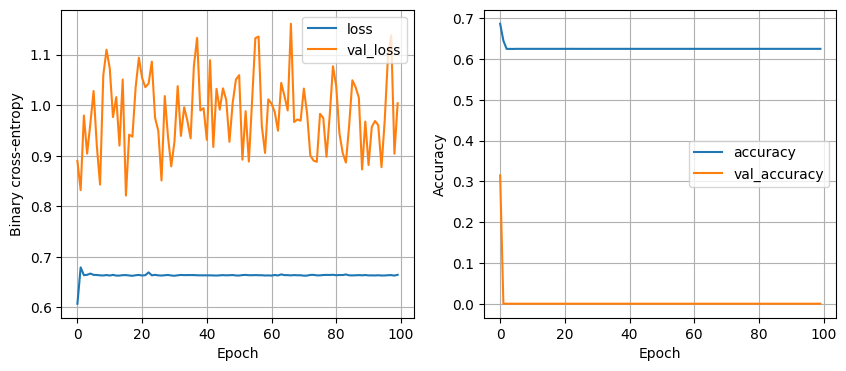

119/119 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6485
64 nodes, dropout 0.2, lr 0.1, batch size 64


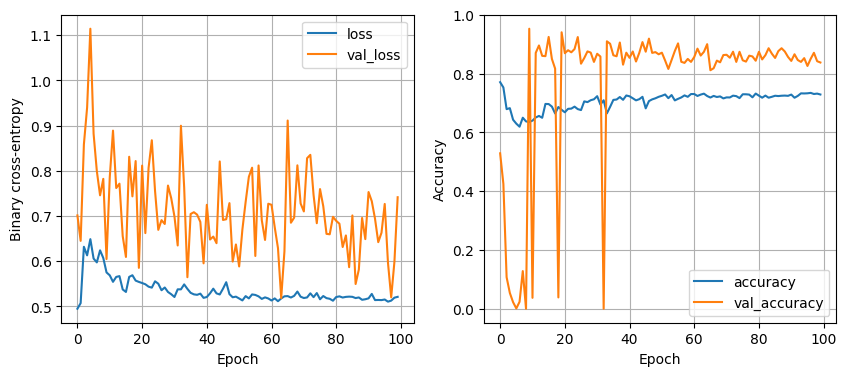

119/119 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8262
64 nodes, dropout 0.2, lr 0.1, batch size 128


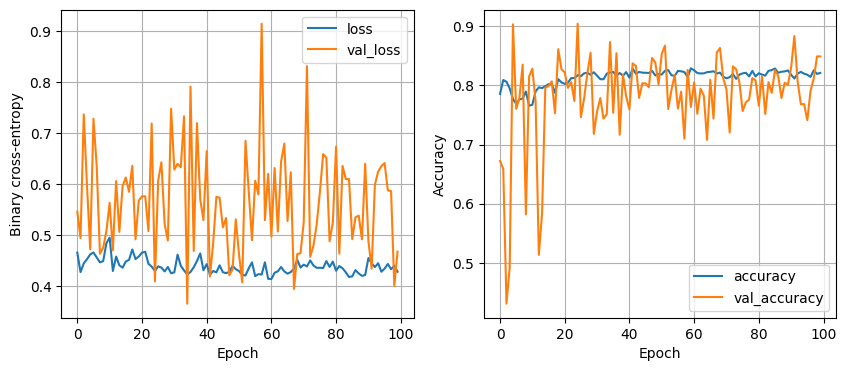

119/119 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8470
64 nodes, dropout 0.2, lr 0.005, batch size 32


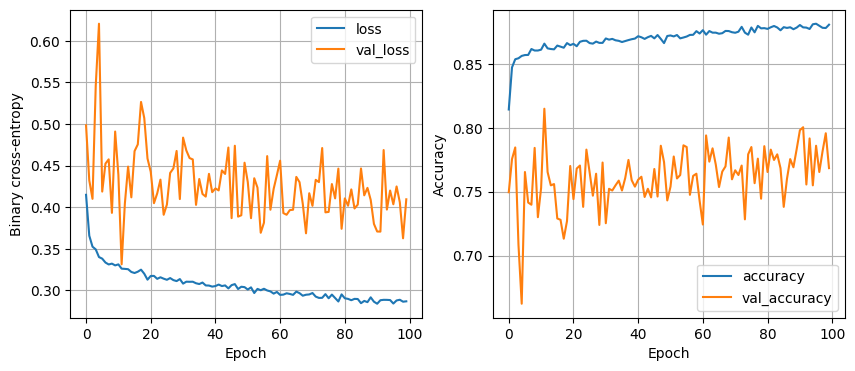

119/119 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8846
64 nodes, dropout 0.2, lr 0.005, batch size 64


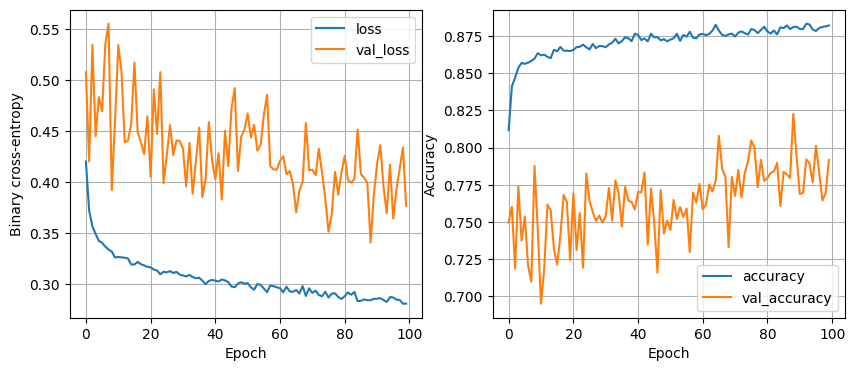

119/119 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8870
64 nodes, dropout 0.2, lr 0.005, batch size 128


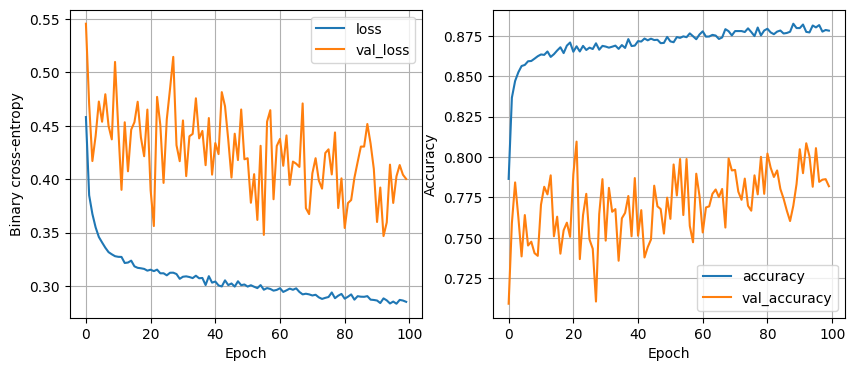

119/119 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8841
64 nodes, dropout 0.2, lr 0.001, batch size 32


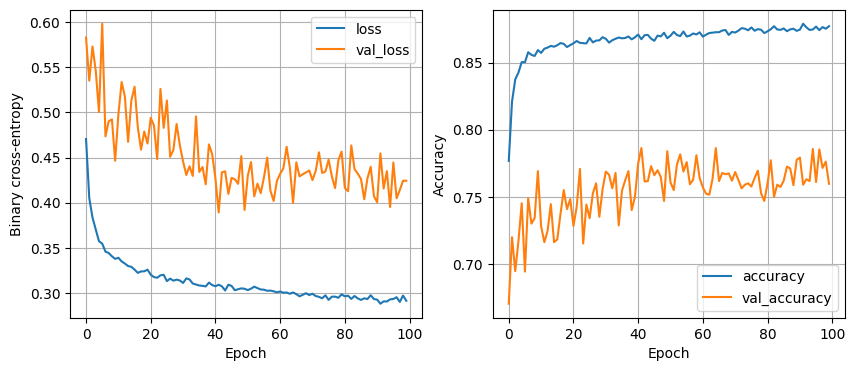

119/119 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8835
64 nodes, dropout 0.2, lr 0.001, batch size 64


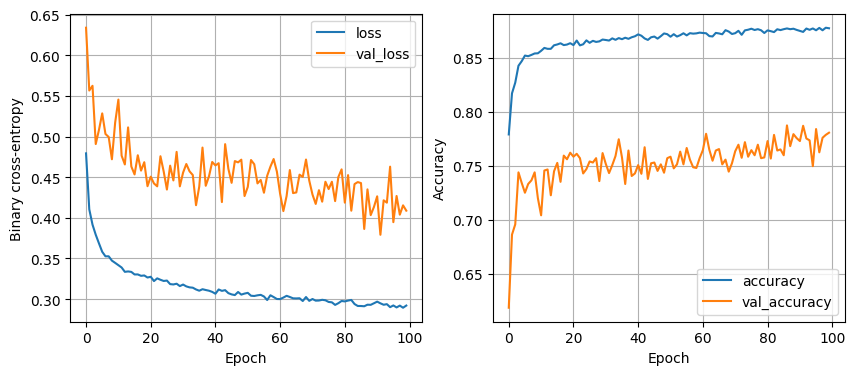

119/119 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8828
64 nodes, dropout 0.2, lr 0.001, batch size 128


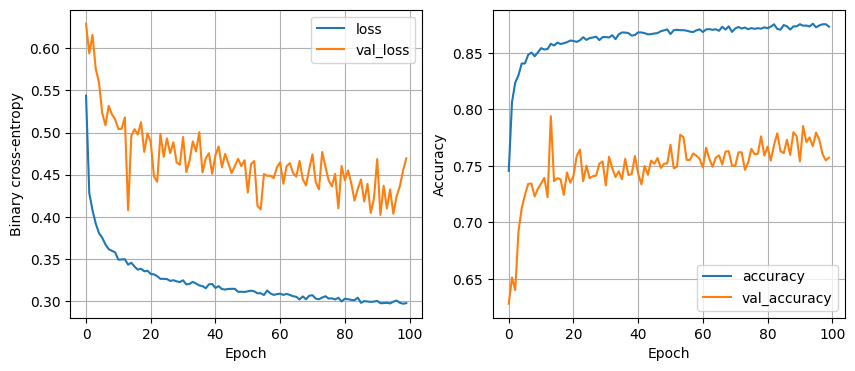

119/119 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8807


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history  = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        # the model we are using will now contain our train neural network model which we returned as output from the function train_model
        # this will will return a list, so we are just grabing the first value from the list
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          last_loss_model = model

